In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
# Importer les bibliothèques nécessaires
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [38]:
# Charger le jeu de données Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Caractéristiques (features)
Y = iris.target      # Classes cibles (target)



In [36]:
# Créer un DataFrame avec les caractéristiques et les classes
df_iris = pd.DataFrame(data=X, columns=iris.feature_names)
df_iris['target'] = Y

In [37]:
#Afficher les 5 premières lignes du DataFrame
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [26]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [39]:
# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [40]:
# Créer le modèle de régression logistique
modele_regression_logistique = linear_model.LogisticRegression(multi_class='multinomial')

In [41]:
# Entraîner le modèle
modele_regression_logistique.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [42]:
# Prédire les classes pour l'ensemble de test
classe_predite = modele_regression_logistique.predict(X_test)


In [43]:
# Calculer et afficher le taux d'exactitude
accuracy = accuracy_score(Y_test, classe_predite)
print(f"Taux d'exactitude: {accuracy:.2f}")

Taux d'exactitude: 0.90


In [44]:
# Générer la matrice de confusion
matrice_confusion = confusion_matrix(Y_test, classe_predite)


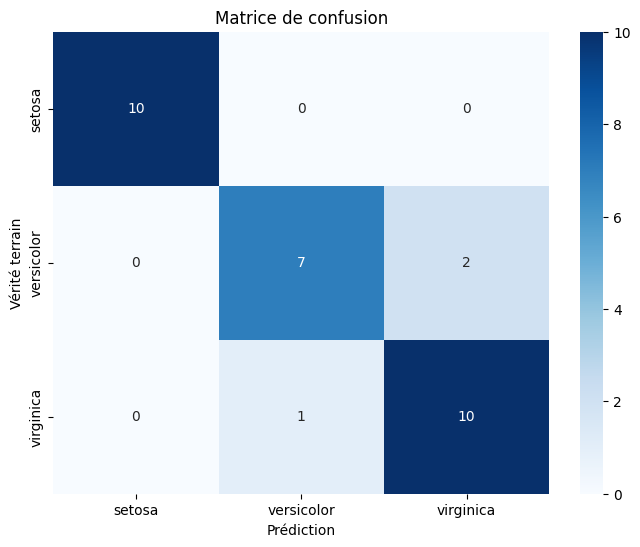

In [45]:
#Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction')
plt.title('Matrice de confusion')
plt.show()

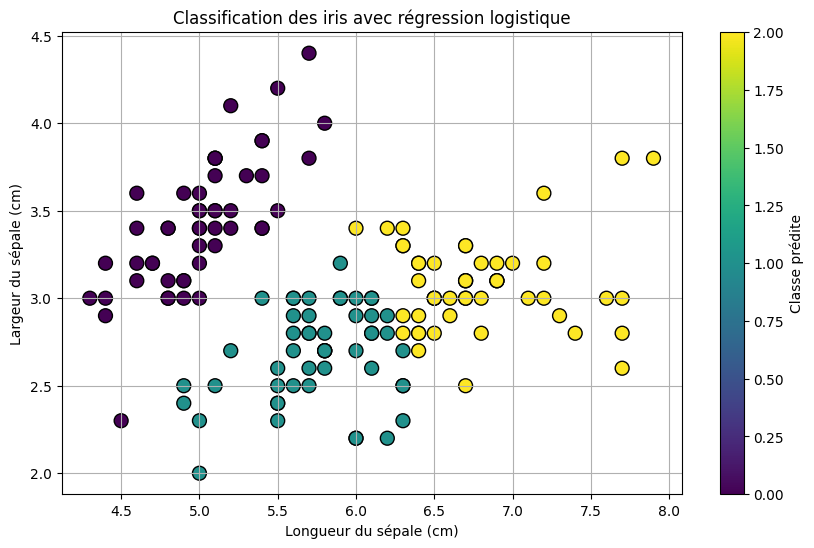

In [51]:
# Tracer les points du dataset avec les classes prédites
plt.figure(figsize=(10, 6))
# Prédire les classes pour l'ensemble complet pour la visualisation
classe_predite_complete = modele_regression_logistique.predict(X)

# Tracer les points
plt.scatter(X[:, 0], X[:, 1], c=classe_predite_complete, cmap='viridis', edgecolor='k', s=100)

# Ajouter des labels et un titre
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('Classification des iris avec régression logistique')
plt.colorbar(label='Classe prédite')
plt.grid(True)
plt.show()